In [17]:
import numpy as np
import matplotlib.pyplot as plt
from networks import Network, regression_loss, classification_loss
import pickle

In [18]:
with open('assignment-one-test-parameters.pkl', 'rb') as f:
    data = pickle.load(f)

In [19]:
data.keys()

dict_keys(['w1', 'w2', 'w3', 'b1', 'b2', 'b3', 'inputs', 'targets'])

In [20]:
data["b1"].shape

(10,)

In [21]:
np.random.seed(9) #Setting consistant seed for later testing

In [22]:
model = Network(input_size=2) #The network should have two inputs,  
model.add_layer(neuron_size=10, nonlinearity='relu') #two hidden layers with ten neurons each, The hidden-layer neurons should have ReLU nonlinearitie
model.add_layer(neuron_size=10, nonlinearity='relu')
model.add_layer(neuron_size=1, nonlinearity='linear') #and a single output. The output neuron should not have a nonlinearity.

weights = [data["w1"].copy().T, data["w2"].copy().T, data["w3"].copy().T] #Use the weights, biases, inputs, and targets in the file assignment-one-test-parameters.pkl
biases = [data["b1"].copy(), data["b2"].copy(), data["b3"].copy()]
model.modify_parameters(weights, biases)

print("Gradient for first input and target pair")
X = np.array(data["inputs"][0]).reshape(1,-1) #Reshaping file data
y = np.array(data["targets"][0]).reshape(-1,1)

model.forward(X) 
model.backward(y)
print("First layer weights gradient")
print(f"Shape: {model.weights_grads[0].shape}")
print(model.weights_grads[0])
print("First layer biases gradient")
print(f"Shape: {model.biases_grads[0].shape}")
print(model.biases_grads[0])

Gradient for first input and target pair
First layer weights gradient
Shape: (2, 10)
[[-0.0210035  -0.0184767   0.          0.01776593  0.          0.
  -0.00974717  0.          0.          0.        ]
 [-0.09259178 -0.08145263  0.          0.0783193   0.          0.
  -0.04296942  0.          0.          0.        ]]
First layer biases gradient
Shape: (10,)
[-0.21514022 -0.18925803  0.          0.18197762  0.          0.
 -0.09984094  0.          0.          0.        ]


Epoch 0/5 - Loss: 0.5380007999139312
Epoch 1/5 - Loss: 0.5349548334472647
Epoch 2/5 - Loss: 0.5319943836668033
Epoch 3/5 - Loss: 0.5291157052219103
Epoch 4/5 - Loss: 0.5263170816498597
Epoch 5/5 - Loss: 0.5235937562788231


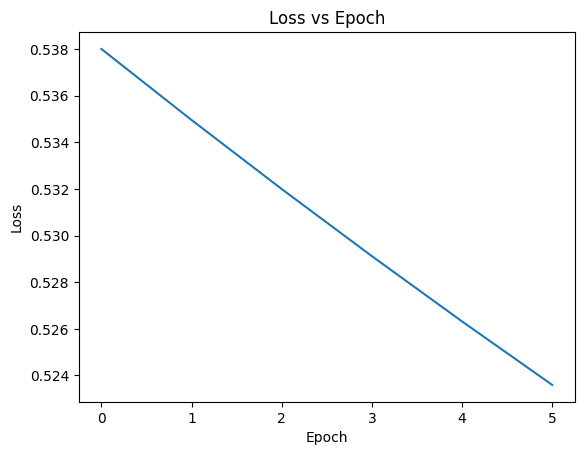

In [23]:
model = Network(input_size=2)
model.add_layer(neuron_size=10, nonlinearity='relu')
model.add_layer(neuron_size=10, nonlinearity='relu')
model.add_layer(neuron_size=1, nonlinearity='linear')

weights = [data["w1"].copy().T, data["w2"].copy().T, data["w3"].copy().T]
biases = [data["b1"].copy(), data["b2"].copy(), data["b3"].copy()]
model.modify_parameters(weights, biases)

X = data["inputs"]
y = data["targets"]

num_epochs = 5 #train the network for five epochs.
learning_rate = 0.01 #learning rate is defined here, where we subtract 1/100th of the gradient from the parameters

loss_list = []

for i in range(num_epochs):
    model.zero_grads()
    outputs = model.forward(X)
    model.backward(y)
    model.update_parameters(learning_rate)

    loss = regression_loss(y, outputs) / y.shape[0]
    loss_list.append(loss)

    print(f"Epoch {i}/{num_epochs} - Loss: {loss}")

loss = regression_loss(y, model.forward(X)) / y.shape[0]
loss_list.append(loss)
print(f"Epoch {i+1}/{num_epochs} - Loss: {loss}")

plt.plot(loss_list)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs Epoch")
plt.show()

# Regression

In [24]:
from sklearn.model_selection import train_test_split

(442, 10) (442,)
(353, 10) (89, 10)
Epoch 0/5000 - Train Loss: 14826.107805848917 - Test Loss: 13371.602922276172 - Train Percent Error: 0.99974302085866 - Test Percent Error: 0.9997408725774882
Epoch 1/5000 - Train Loss: 14825.714275517883 - Test Loss: 13371.223643792022 - Train Percent Error: 0.9997195772206762 - Test Percent Error: 0.9997182373489683
Epoch 2/5000 - Train Loss: 14825.317126405842 - Test Loss: 13370.83889260779 - Train Percent Error: 0.9996959559313197 - Test Percent Error: 0.9996953528000055
Epoch 3/5000 - Train Loss: 14824.913667244358 - Test Loss: 13370.451025544873 - Train Percent Error: 0.9996719999887419 - Test Percent Error: 0.9996720833141108
Epoch 4/5000 - Train Loss: 14824.50578042336 - Test Loss: 13370.057435902505 - Train Percent Error: 0.9996478045252202 - Test Percent Error: 0.9996485134206279
Epoch 5/5000 - Train Loss: 14824.092151261344 - Test Loss: 13369.656870567722 - Train Percent Error: 0.9996233383758577 - Test Percent Error: 0.9996245581481035
Ep

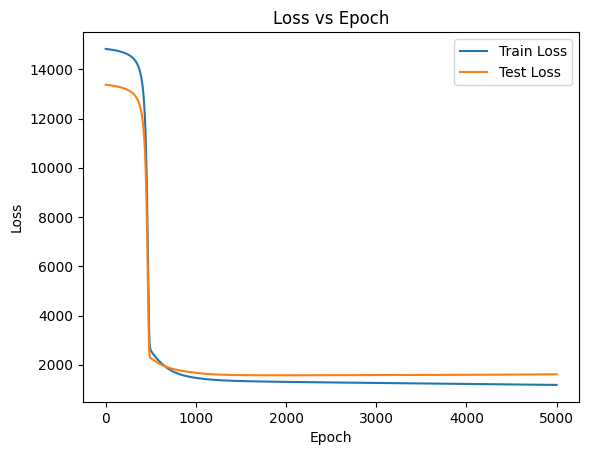

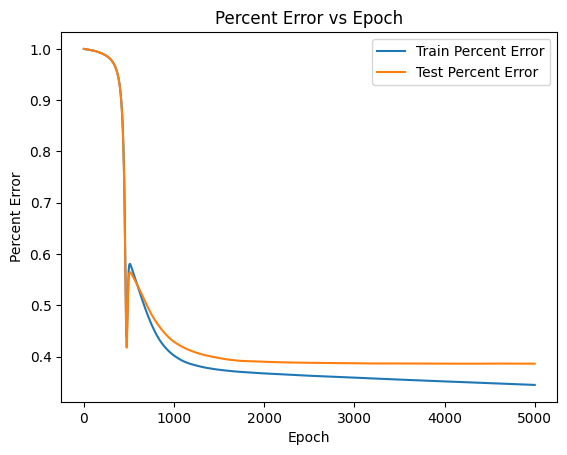

In [25]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes() #Here we test the model on a new dataset in order to validate its preformance
X = diabetes.data
y = diabetes.target

print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)
print(X_train.shape, X_test.shape)

num_epochs = 5000
learning_rate = 0.00001

model = Network(input_size=X_train.shape[1]) # The network before is too simple to solve this problem making a wider one proving flexibility
model.add_layer(neuron_size=500, nonlinearity='relu')
model.add_layer(neuron_size=100, nonlinearity='relu')
model.add_layer(neuron_size=50, nonlinearity='relu')
model.add_layer(neuron_size=10, nonlinearity='relu')
model.add_layer(neuron_size=1, nonlinearity='linear')

train_loss_list = []
test_loss_list = []
train_per_err_list = []
test_per_err_list = []

for i in range(num_epochs): #Training the network 
    model.zero_grads()
    outputs = model.forward(X_train)
    model.backward(y_train)
    model.update_parameters(learning_rate)

    train_per_err = np.mean(np.abs(y_train.reshape(-1, 1) - outputs.reshape(-1, 1)) / y_train.reshape(-1, 1))
    train_per_err_list.append(train_per_err)
    train_loss = regression_loss(y_train, outputs) / y_train.shape[0]
    train_loss_list.append(train_loss)

    test_outputs = model.forward(X_test)
    test_per_err = np.mean(np.abs(y_test.reshape(-1, 1) - test_outputs.reshape(-1, 1)) / y_test.reshape(-1, 1))
    test_per_err_list.append(test_per_err)
    test_loss = regression_loss(y_test, test_outputs) / y_test.shape[0]
    test_loss_list.append(test_loss)

    print(f"Epoch {i}/{num_epochs} - Train Loss: {train_loss} - Test Loss: {test_loss} - Train Percent Error: {train_per_err} - Test Percent Error: {test_per_err}")

plt.plot(train_loss_list, label='Train Loss')
plt.plot(test_loss_list, label='Test Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs Epoch")
plt.legend()
plt.show()

plt.plot(train_per_err_list, label='Train Percent Error')
plt.plot(test_per_err_list, label='Test Percent Error')
plt.xlabel("Epoch")
plt.ylabel("Percent Error")
plt.title("Percent Error vs Epoch")
plt.legend()
plt.show()


# Binary classification

(569, 30) (569,)
Epoch 1/1000 - Train Loss, Acc: 16.541051300100676 0.378021978021978 - Test Loss, Acc: 13.503714014566102 0.37719298245614036
Epoch 2/1000 - Train Loss, Acc: 11.999098955460163 0.3934065934065934 - Test Loss, Acc: 8.145440676697158 0.4473684210526316
Epoch 3/1000 - Train Loss, Acc: 6.683085724022798 0.4857142857142857 - Test Loss, Acc: 4.856092043058975 0.5701754385964912
Epoch 4/1000 - Train Loss, Acc: 3.475031386383048 0.6791208791208792 - Test Loss, Acc: 3.5699459597296412 0.7105263157894737
Epoch 5/1000 - Train Loss, Acc: 2.3968551290140026 0.7362637362637363 - Test Loss, Acc: 3.018701613290977 0.7456140350877193
Epoch 6/1000 - Train Loss, Acc: 2.007825237409078 0.7912087912087912 - Test Loss, Acc: 2.769849110139538 0.7719298245614035
Epoch 7/1000 - Train Loss, Acc: 1.845918989465283 0.810989010989011 - Test Loss, Acc: 2.662539636566075 0.7982456140350878
Epoch 8/1000 - Train Loss, Acc: 1.774396076738436 0.8285714285714286 - Test Loss, Acc: 2.6078436688435316 0.807

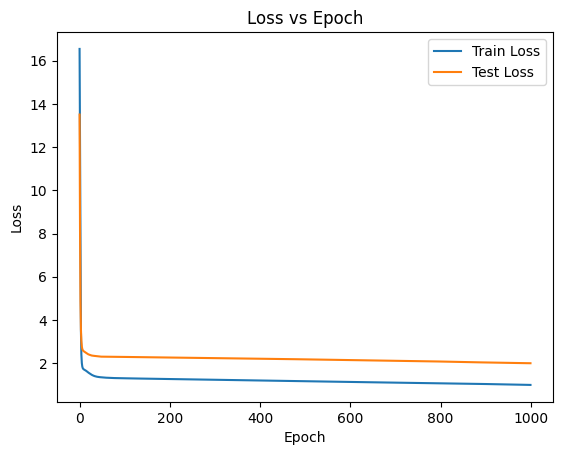

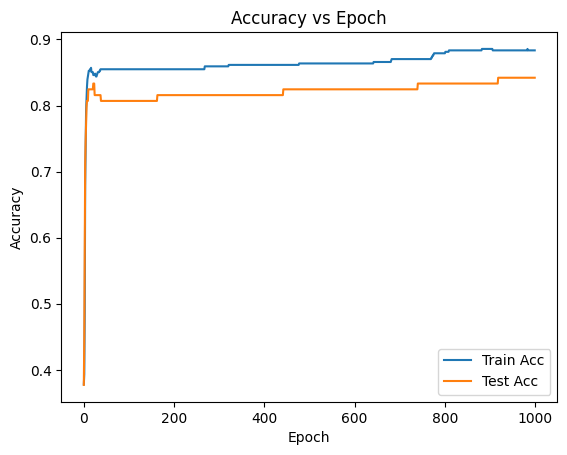

In [16]:
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer() #Repeating the above for classification to prove our capability
X, y = cancer.data, cancer.target

print(X.shape, y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=67, stratify=y)

num_epochs = 1000
learning_rate = 1e-5

model = Network(input_size=X_train.shape[1])
model.add_layer(neuron_size=10, nonlinearity='relu')
model.add_layer(neuron_size=10, nonlinearity='relu')
model.add_layer(neuron_size=1, nonlinearity='sigmoid')

train_loss_list = []
test_loss_list = []
train_acc_list = []
test_acc_list = []

for i in range(num_epochs):
    model.zero_grads()
    outputs = model.forward(X_train)
    model.backward(y_train)
    model.update_parameters(learning_rate)
    train_loss = classification_loss(y_train, outputs) / y_train.shape[0]
    train_loss_list.append(train_loss)
    train_pred = (outputs >= 0.5).astype(int).flatten()
    train_acc = accuracy_score(y_train, train_pred)
    train_acc_list.append(train_acc)

    test_outputs = model.forward(X_test)
    test_loss = classification_loss(y_test, test_outputs) / y_test.shape[0]
    test_loss_list.append(test_loss)
    test_pred = (test_outputs >= 0.5).astype(int).flatten()
    test_acc = accuracy_score(y_test, test_pred)
    test_acc_list.append(test_acc)

    print(f"Epoch {i+1}/{num_epochs} - Train Loss, Acc: {train_loss} {train_acc} - Test Loss, Acc: {test_loss} {test_acc}")

plt.plot(train_loss_list, label='Train Loss')
plt.plot(test_loss_list, label='Test Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss vs Epoch")
plt.legend()
plt.show()

plt.plot(train_acc_list, label='Train Acc')
plt.plot(test_acc_list, label='Test Acc')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Epoch")
plt.legend()